In [1]:
import json
import pytesseract
from PIL import Image, ImageDraw

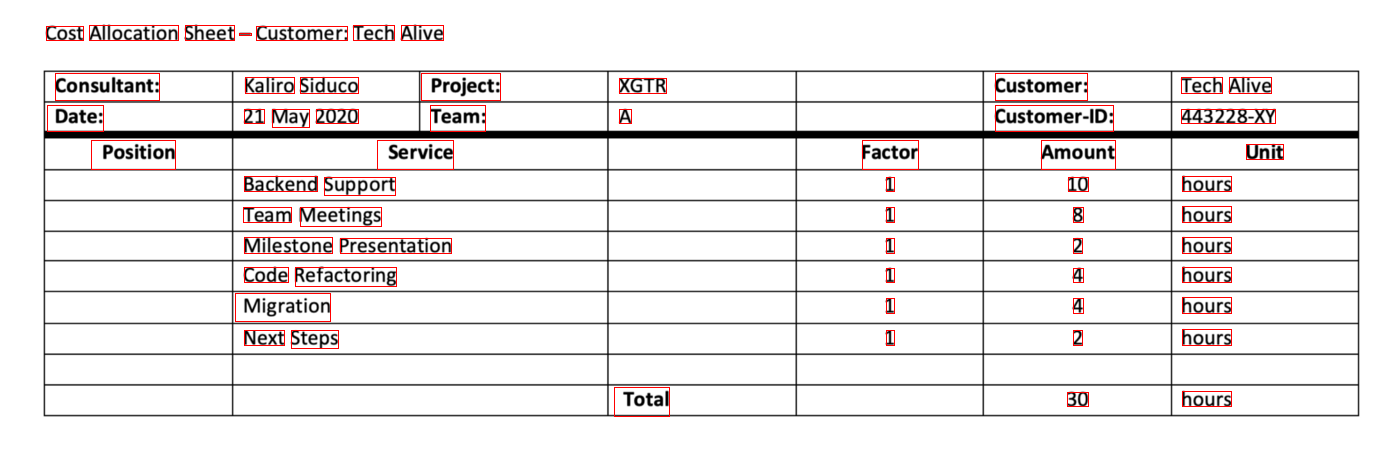

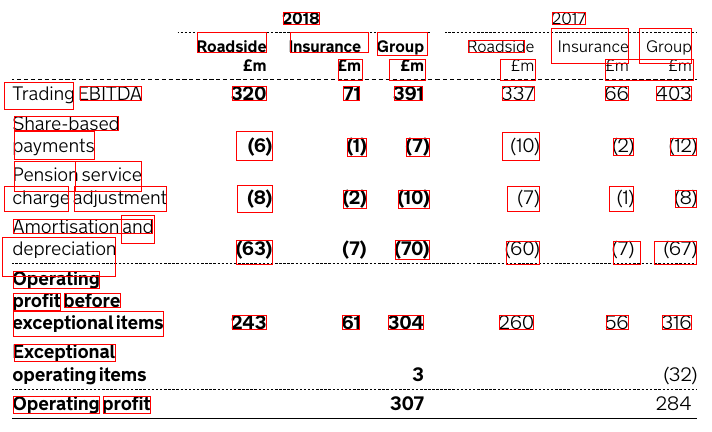

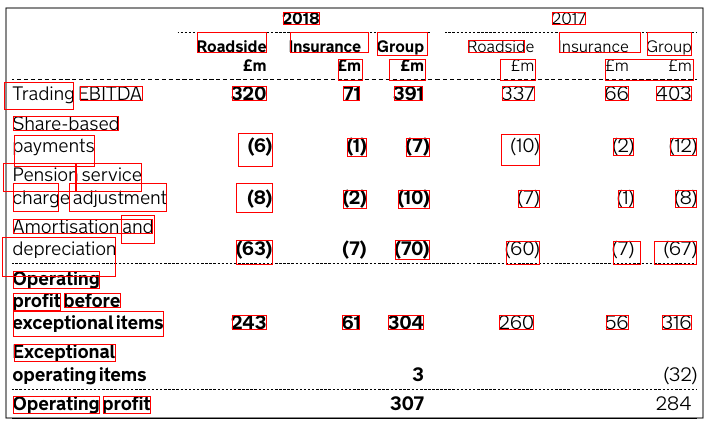

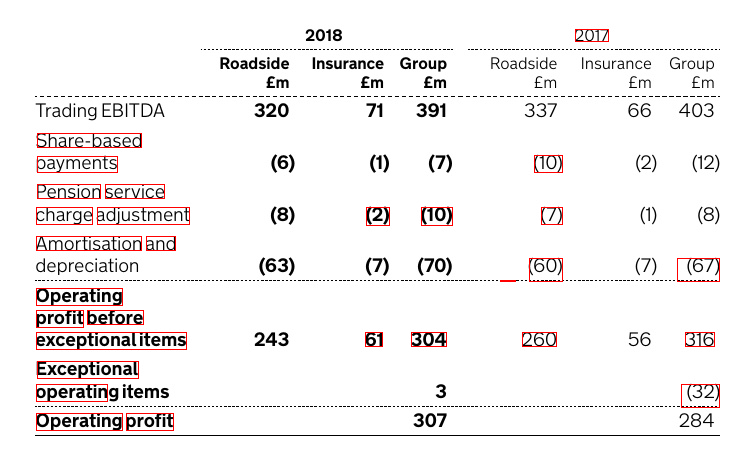

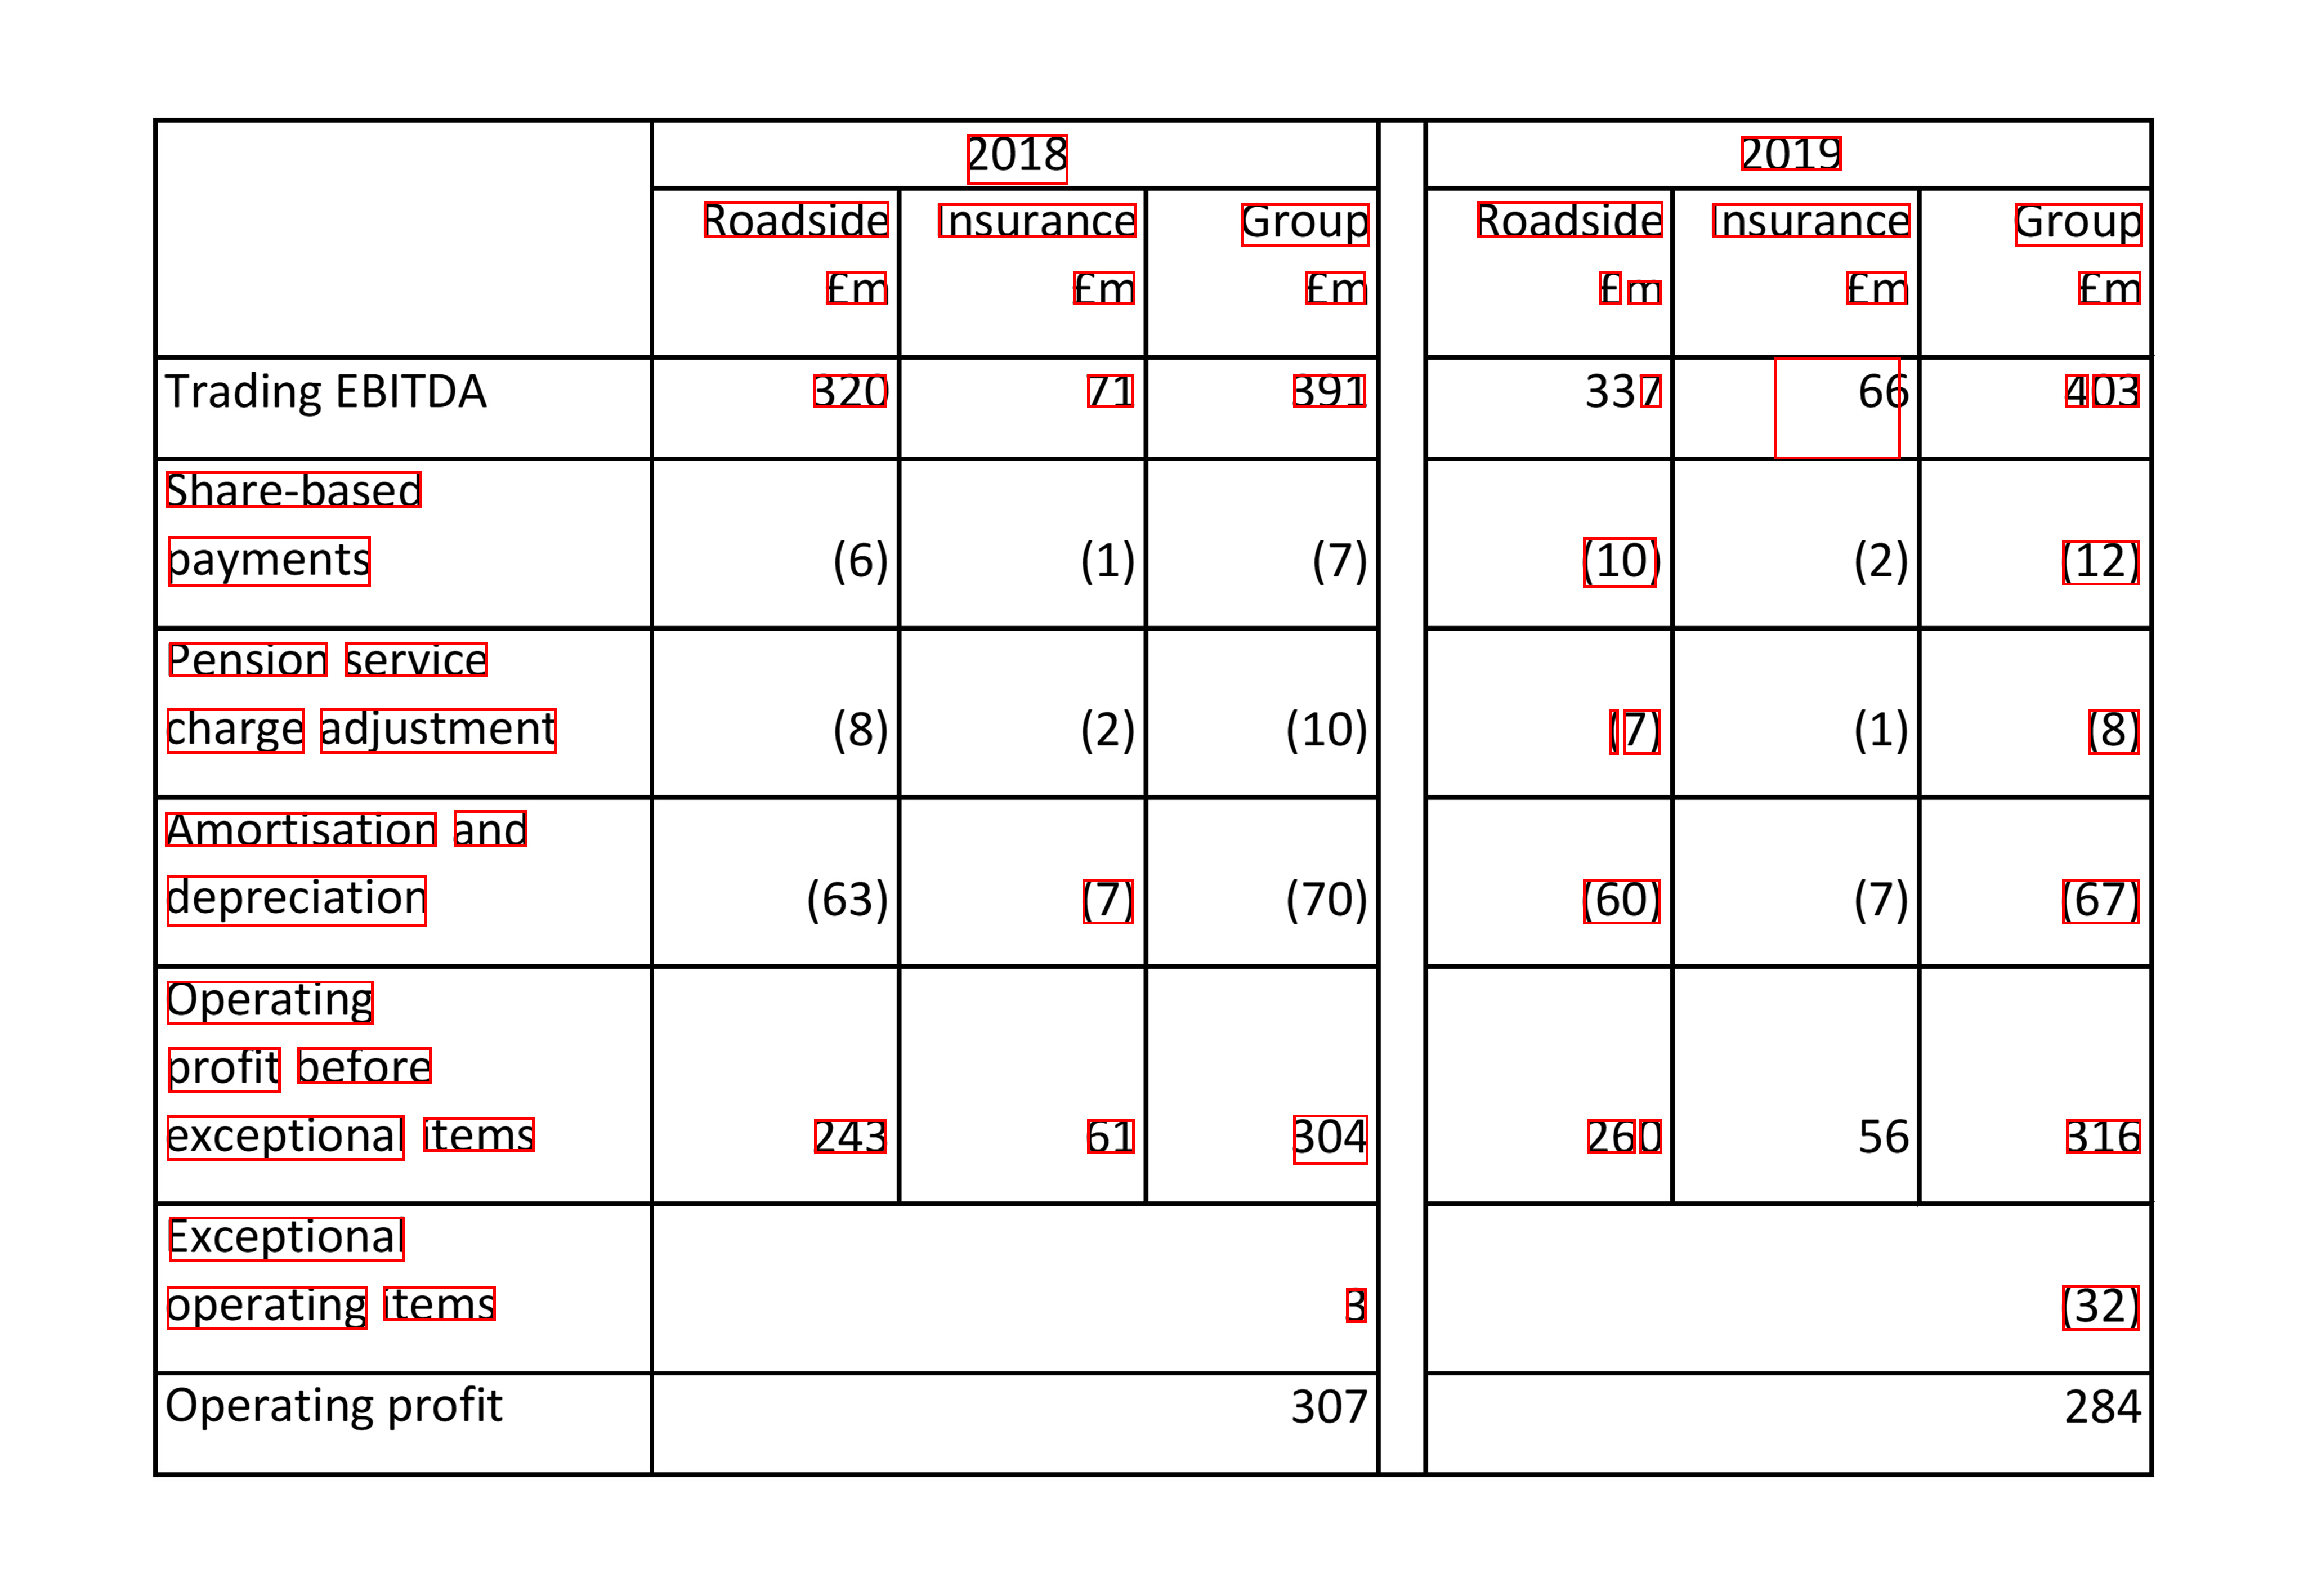

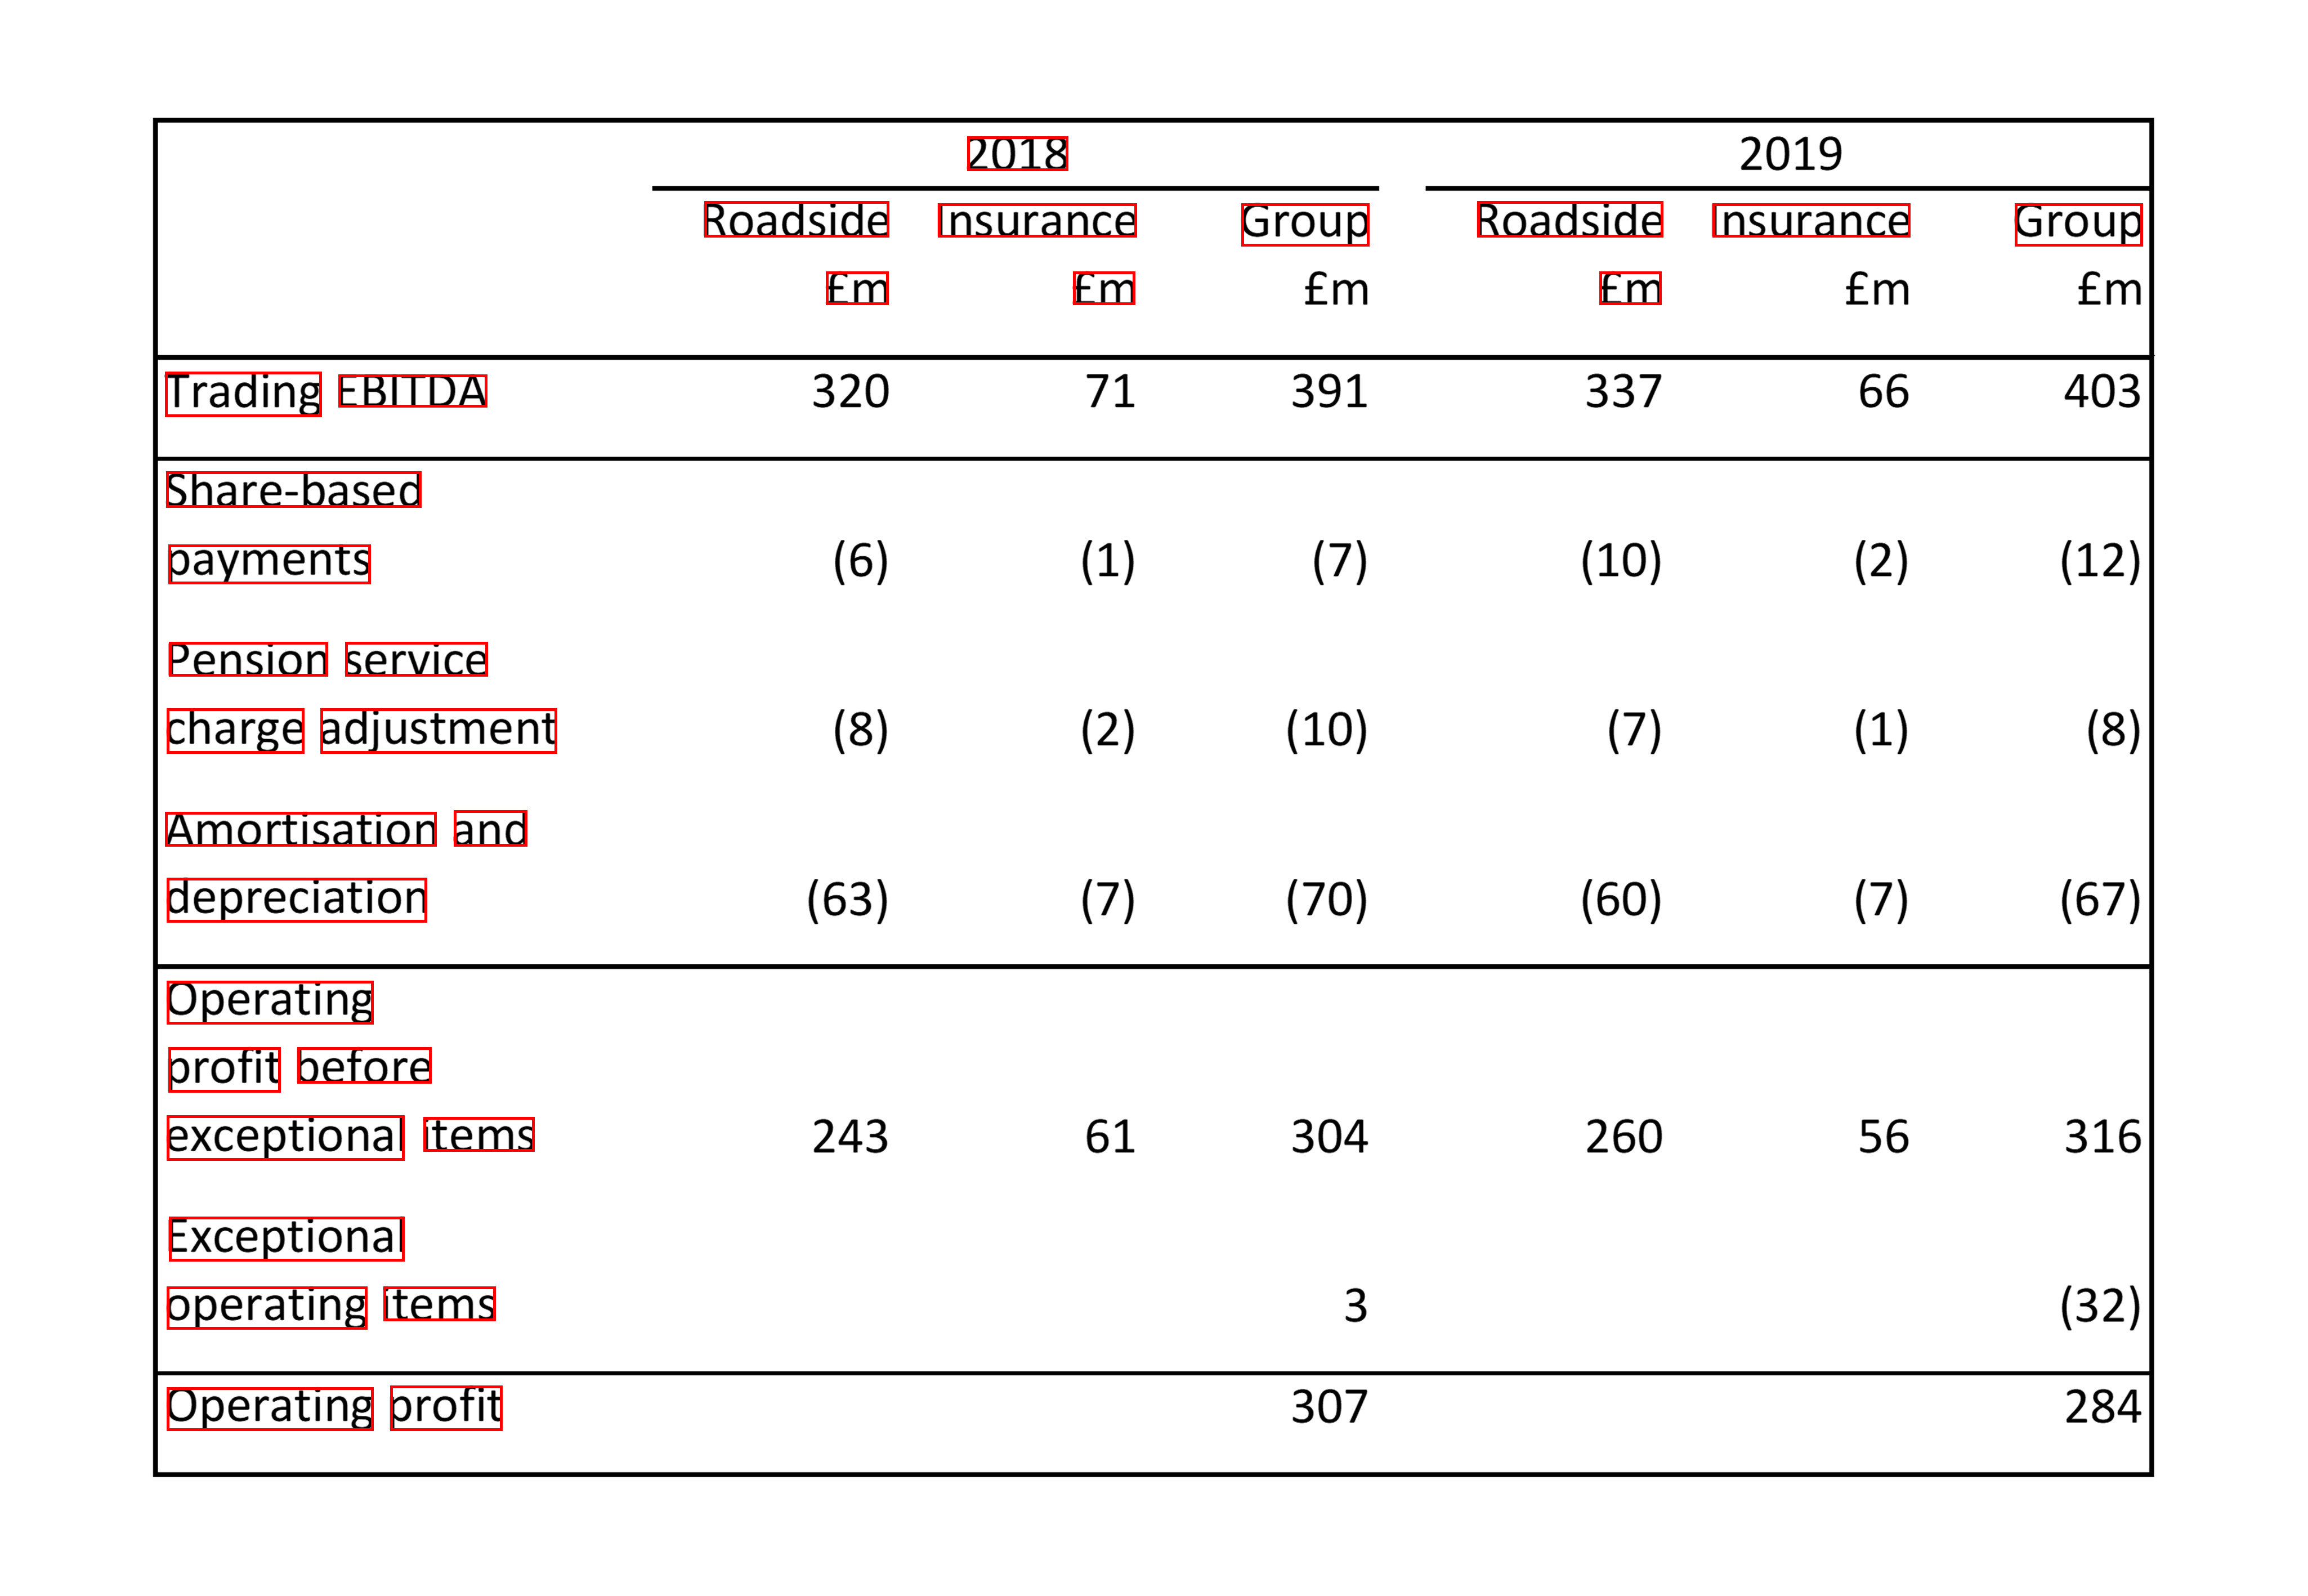

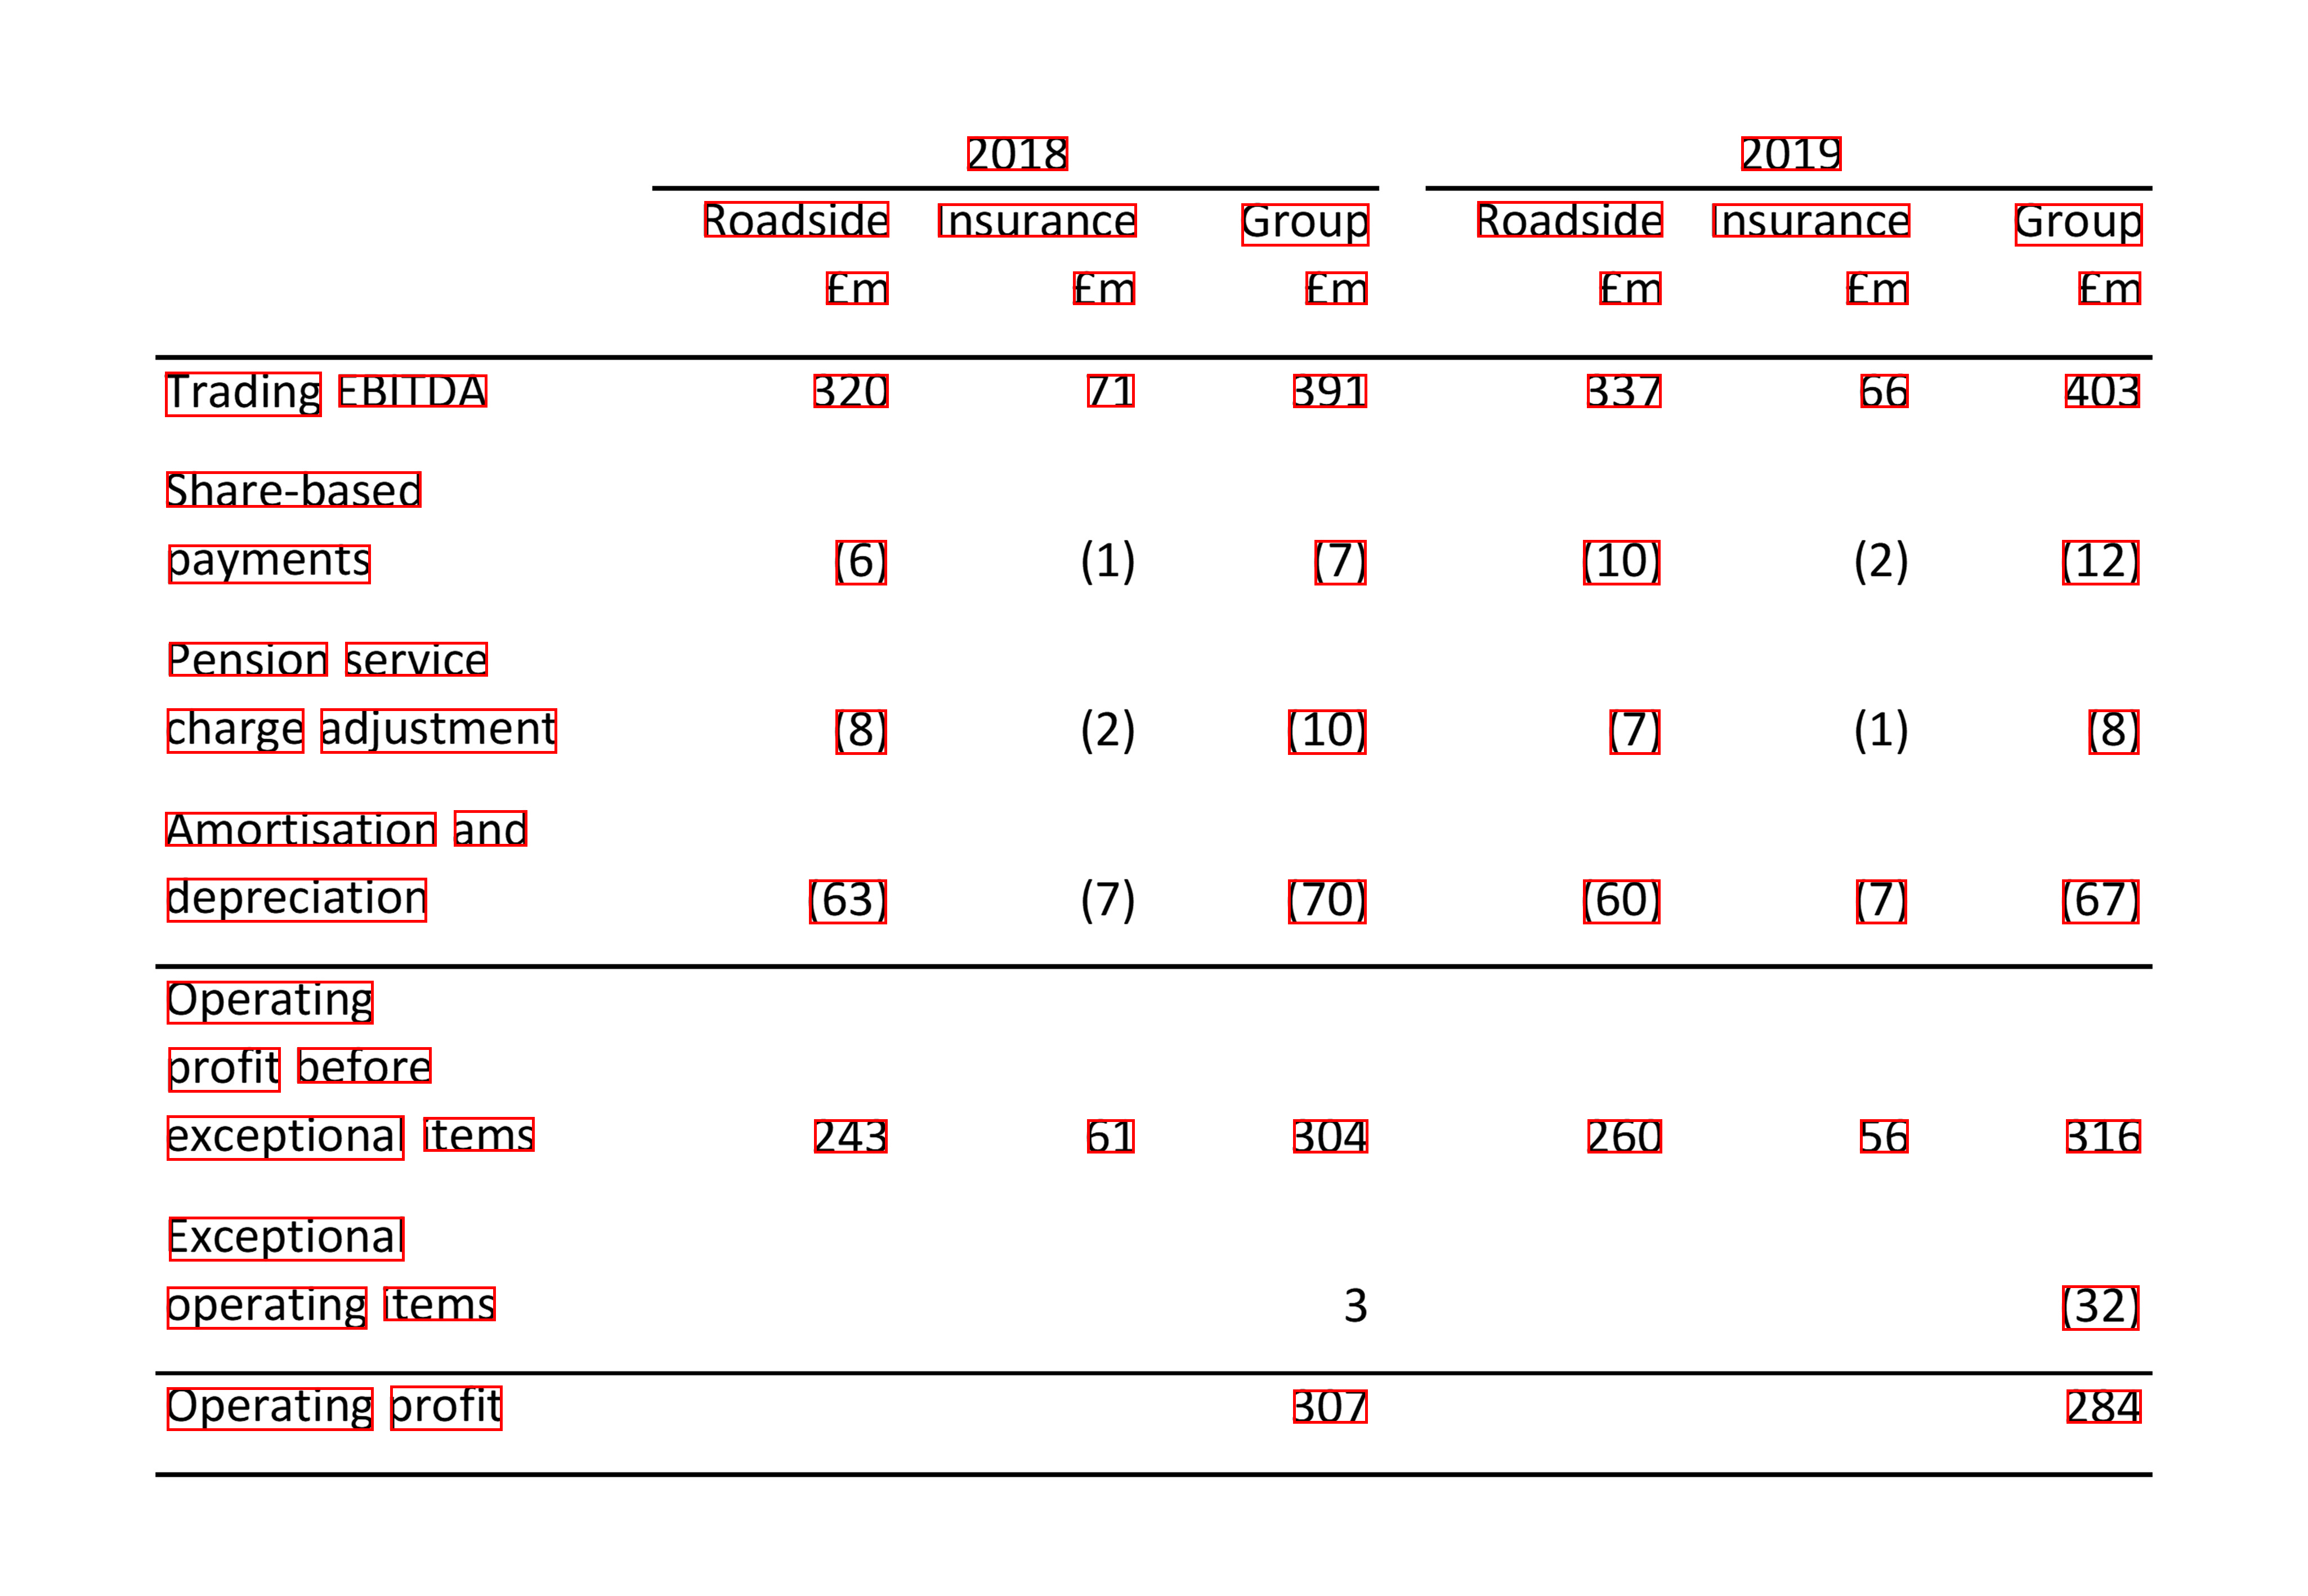

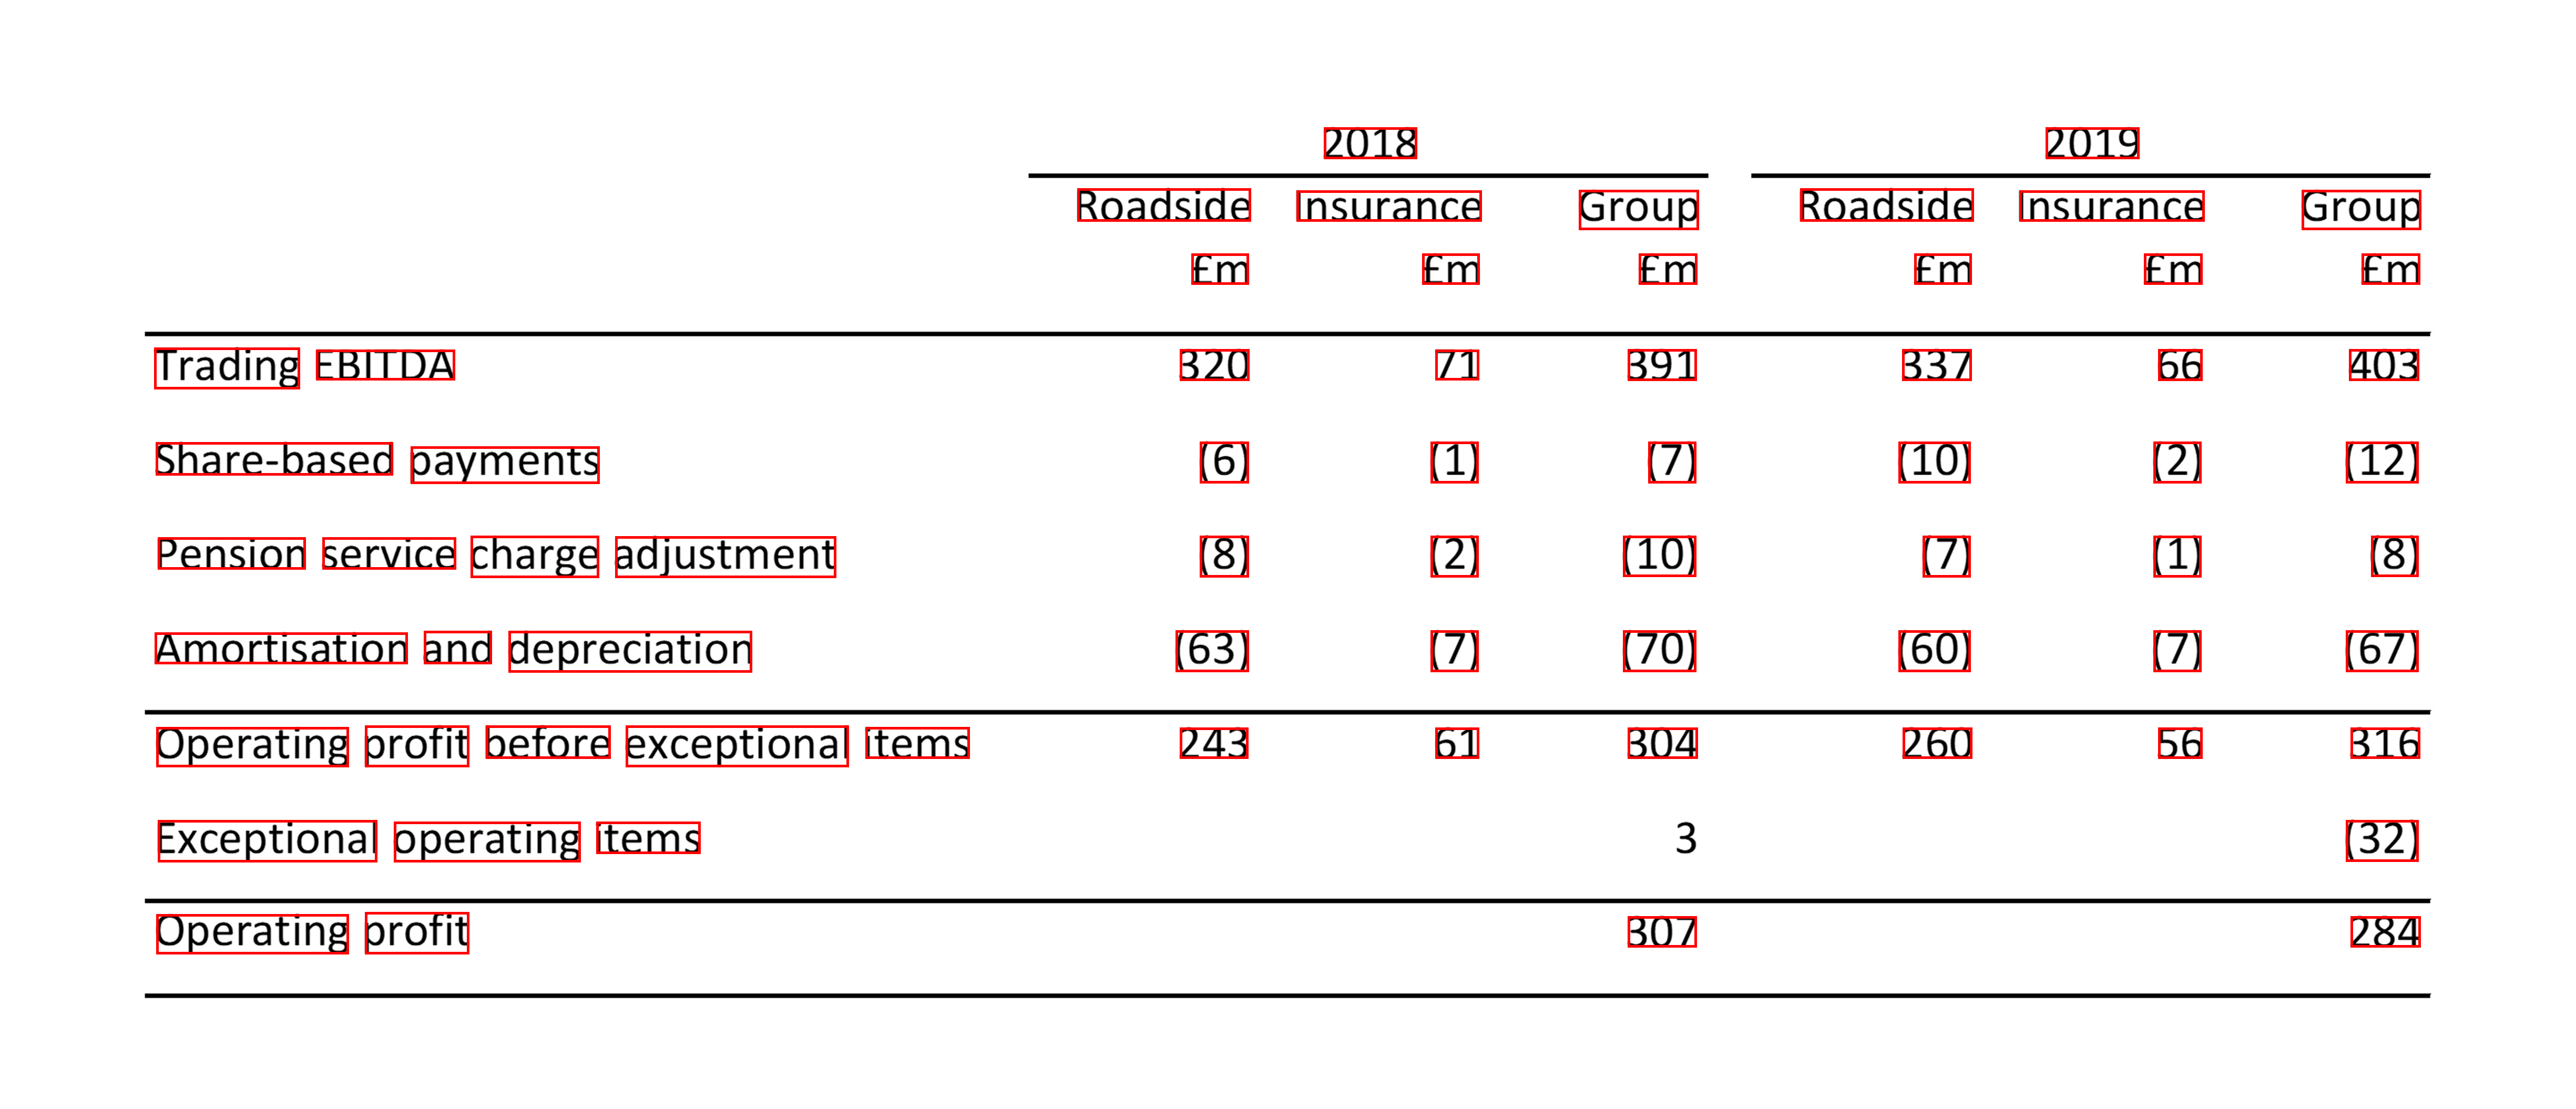

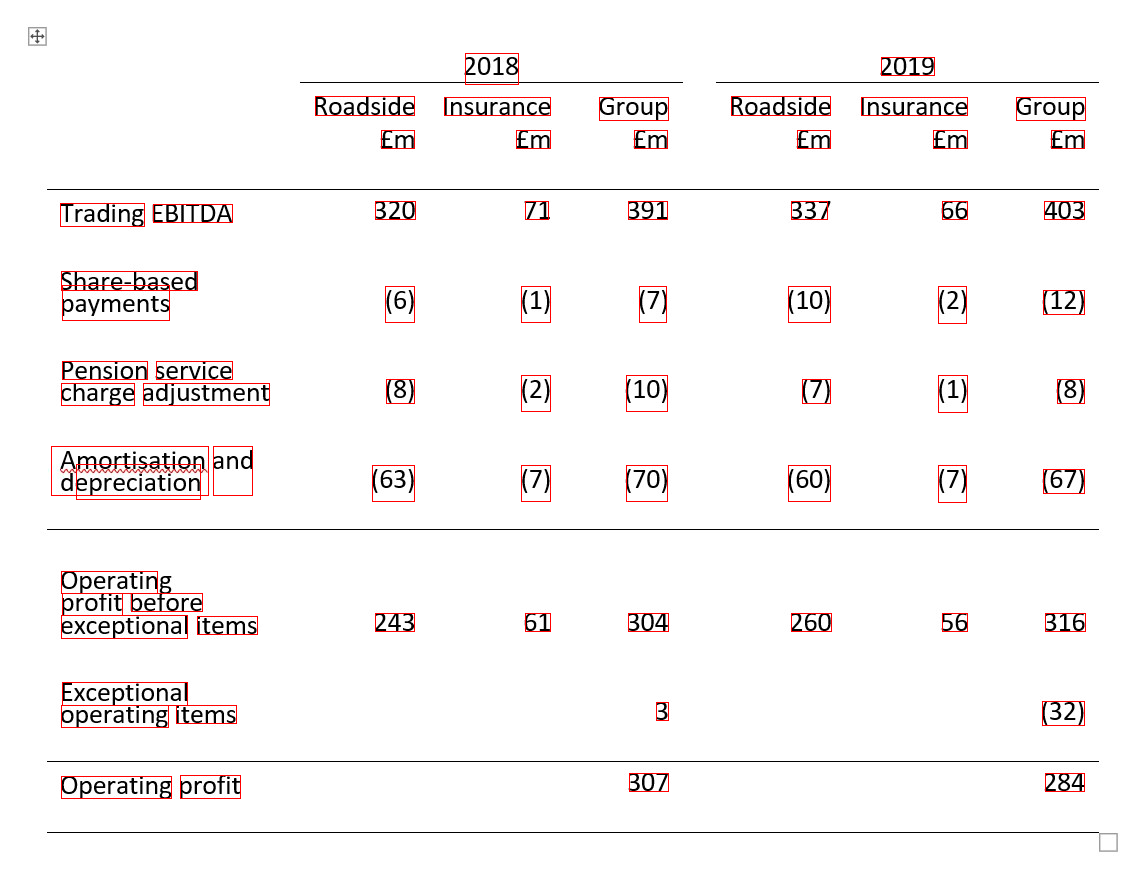

In [2]:
span_num = 0

for img_path, word_ann_path, width in [
    ("../data/Own-Samples/example-table.jpg", "../data/Own-Samples/example-table_words.json", 1),
    ("../data/Own-Samples/AA 2018_30_crop.jpg", "../data/Own-Samples/AA 2018_30_crop_words.json", 1),
    ("../data/Own-Samples/AA 2018_30_crop_2.jpg", "../data/Own-Samples/AA 2018_30_crop_2_words.json", 1),
    ("../data/Own-Samples/AA 2018_30_crop_3.jpg", "../data/Own-Samples/AA 2018_30_crop_3_words.json", 1),
    ("../data/Own-Samples/Picture1.jpg", "../data/Own-Samples/Picture1_words.json", 5),
    ("../data/Own-Samples/Picture2.jpg", "../data/Own-Samples/Picture2_words.json", 5),
    ("../data/Own-Samples/Picture3.jpg", "../data/Own-Samples/Picture3_words.json", 5),
    ("../data/Own-Samples/Picture4.jpg", "../data/Own-Samples/Picture4_words.json", 5),
    ("../data/Own-Samples/Picture5.jpg", "../data/Own-Samples/Picture5_words.json", 1),
]:
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    #display(img)

    boxes = pytesseract.image_to_data(img)

    word_bbox = []
    for b in boxes.splitlines()[1:]:
        b = b.split()
        if len(b) == 12 and int(b[10])>0:
            #print(b)
            
            x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            #print(x, y, w, h)
            
            word_bbox.append({"bbox": [x, y, x+w, y+h], "text": b[11], "flags": 0, "span_num": span_num, "line_num": 0, "block_num": 0})
            span_num += 1

            draw.rectangle([x, y, x+w, y+h], outline="red", width=width)

    display(img)

    with open(word_ann_path, "w") as f_obj:
        f_obj.write(json.dumps(word_bbox))